[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Projects/Classical_Frameworks/LDA.ipynb)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [20]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stops_esp = set(stopwords.words('spanish'))

In [22]:
df = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/LDA/ted_talks_es.csv") #Kaggle tedtalks dataset

In [23]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Al Gore sobre cómo evitar la crisis climática,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523396,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,Con el mismo humor y humanidad que irradió en ...,Muchas gracias Chris. Y es en verdad un gran h...
1,7,"David Pogue dice ""La Simplicidad Vende""",David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920803,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,"El columnista del New York Times, David Pogue,...","Hola contestadora automática, mi vieja amiga. ..."
2,53,Un recorrido por la renovación urbana de la ma...,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664029,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"En una charla altamente emotiva, la activista ...","Si están presentes aquí hoy, y estoy muy conte..."
3,66,Ken Robinson dice que las escuelas matan la cr...,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65052534,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson plantea de manera entretenida...,"Buenos días. ¿Cómo están? Ha sido increíble, ¿..."
4,92,Hans Rosling nos muestra las mejores estadísti...,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501766,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,Una manera única de presentar datos. Con la en...,"Hace unos 10 años, emprendí la tarea de enseña..."


In [24]:
stops_esp = stops_esp.union({"así", "si", "hacer", "cosas","creo", "cómo", "solo", "aquí", "risas",
                                    "ser", "años", "gente","vez", "historia", "ahora", "entonces", "bien", "puede",
                                    "pueden", "bueno", "aplauso", "aplausos","ee","uu", "datos", "personas",
                                    "hace", "hoy", "cada", "podemos", "ver", "dos", "luego", "hecho", "realmente",
                                    "tan","decir", "saben", "ustedes","dijo", "voy", "quiero", "bf", "dh", "número",
                                    "des", "gran", "día", "puedo", "mismo", "tres", "hombres", "mujeres", "hombre", "mujer",
                                    "hacia", "sólo", "manera", "tipo", "mejor", "tener", "alguien", "después","gracias",
                                    "menos", "ejemplo", "parte", "respuesta", "forma", "todas", "muchas", "lugar", "poder",
                                    "incluso", "sino", "idea", "nunca", "dije", "momento", "siempre", "podría", "veces", "ahí",
                                    "sido", "allí", "dice", "va"})

stops_esp= list(stops_esp)

# remind that these data are about transcription of tedtalks, so new stopwords can be added

In [25]:
df['transcript'][0]

'Muchas gracias Chris. Y es en verdad un gran honor tener la oportunidad de venir a este escenario por segunda vez. Estoy extremadamente agradecido. He quedado conmovido por esta conferencia, y deseo agradecer a todos ustedes sus amables comentarios acerca de lo que tenía que decir la otra noche. Y digo eso sinceramente, en parte porque — (Sollozos fingidos) — ¡lo necesito! (Risas) ¡Pónganse en mi posición! Volé en el avión vicepresidencial por ocho años. ¡Ahora tengo que quitarme mis zapatos o botas para subirme a un avión! (Risas) (Aplausos) Les diré una rápida historia para ilustrar lo que ha sido para mí. Es una historia verdadera — cada parte de esto es verdad. Poco después de que Tipper y yo dejamos la — (Sollozos fingidos) — Casa Blanca — (Risas) — estábamos viajando desde nuestra casa en Nashville a una pequeña granja que tenemos 50 millas al este de Nashville — conduciendo nosotros mismos. Sé que suena como cualquier cosa para ustedes, pero — (Risas) — miré en el retrovisor y 

In [26]:
#Vectorize

vectorizer = CountVectorizer(stop_words = stops_esp)



In [27]:
#All rows for transcript variable
X = vectorizer.fit_transform(df['transcript'])


In [28]:
X #3921 rows with 111271 unique words (without stop words)

<3921x111271 sparse matrix of type '<class 'numpy.int64'>'
	with 1889073 stored elements in Compressed Sparse Row format>

In [29]:
lda = LatentDirichletAllocation(
    n_components = 10, # number of clusters/topics default 10
    random_state = 1234
)

In [31]:
lda.fit(X)

LatentDirichletAllocation(random_state=1234)

In [28]:
# Example with .flatten()
array = np.array([[1, 2, 3], [4, 5, 6]])
flattened_array = array.flatten()
print(flattened_array)  # [1 2 3 4 5 6]


In [32]:
# model : Le modèle LDA entraîné. Ce modèle contient une matrice components_,
# où chaque ligne représente un thème, et chaque colonne un mot du vocabulaire,
#avec un poids représentant la contribution du mot au thème.

# feature_names : Une liste de mots ou termes correspondant aux colonnes de la matrice components_ ( tout le vocabulaire).

# n_top_words (par défaut 10) : Le nombre de mots les plus importants à visualiser pour chaque thème.


#plt.subplots : Crée une grille de sous-graphiques (2 lignes x 5 colonnes), chaque graphique représentant un thème.
#figsize=(30, 15) : Définit la taille globale de la figure.
#axes.flatten() : Convertit la grille 2D d'axes en une liste 1D pour simplifier l'itération.

def chart_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_): #La boucle parcourt chaque thème (chaque ligne de la matrice components_), avec topic représentant les poids des mots pour un thème particulier.
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1] #Sélectionne les indices des n_top_words mots avec les poids les plus élevés (tri décroissant).
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]  # Récupère les poids correspondants.

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7) #Trace un graphique à barres horizontales, où les mots sont sur l'axe des ordonnées (y) et leurs poids sur l'axe des abscisses (x).
        ax.set_title(f"Tema {topic_idx +1}", fontdict={"fontsize": 30}) #Ajoute un titre au graphique ( "Tema 1").
        ax.invert_yaxis() # Inverse l'axe y pour que les mots les plus importants soient en haut
        ax.tick_params(axis="both", which="major", labelsize=20) #Ajuste la taille des étiquettes des axes.
        for i in "top right left".split(): #Cette ligne supprime certaines bordures inutiles du graphique pour une présentation plus propre.
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA', fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [35]:
words = vectorizer.get_feature_names_out() #Renvoie une liste de tous les termes (mots) du vocabulaire
words

array(['00', '000', '0000', ..., '結果並不完美', '送你葱', '高潮關係'], dtype=object)

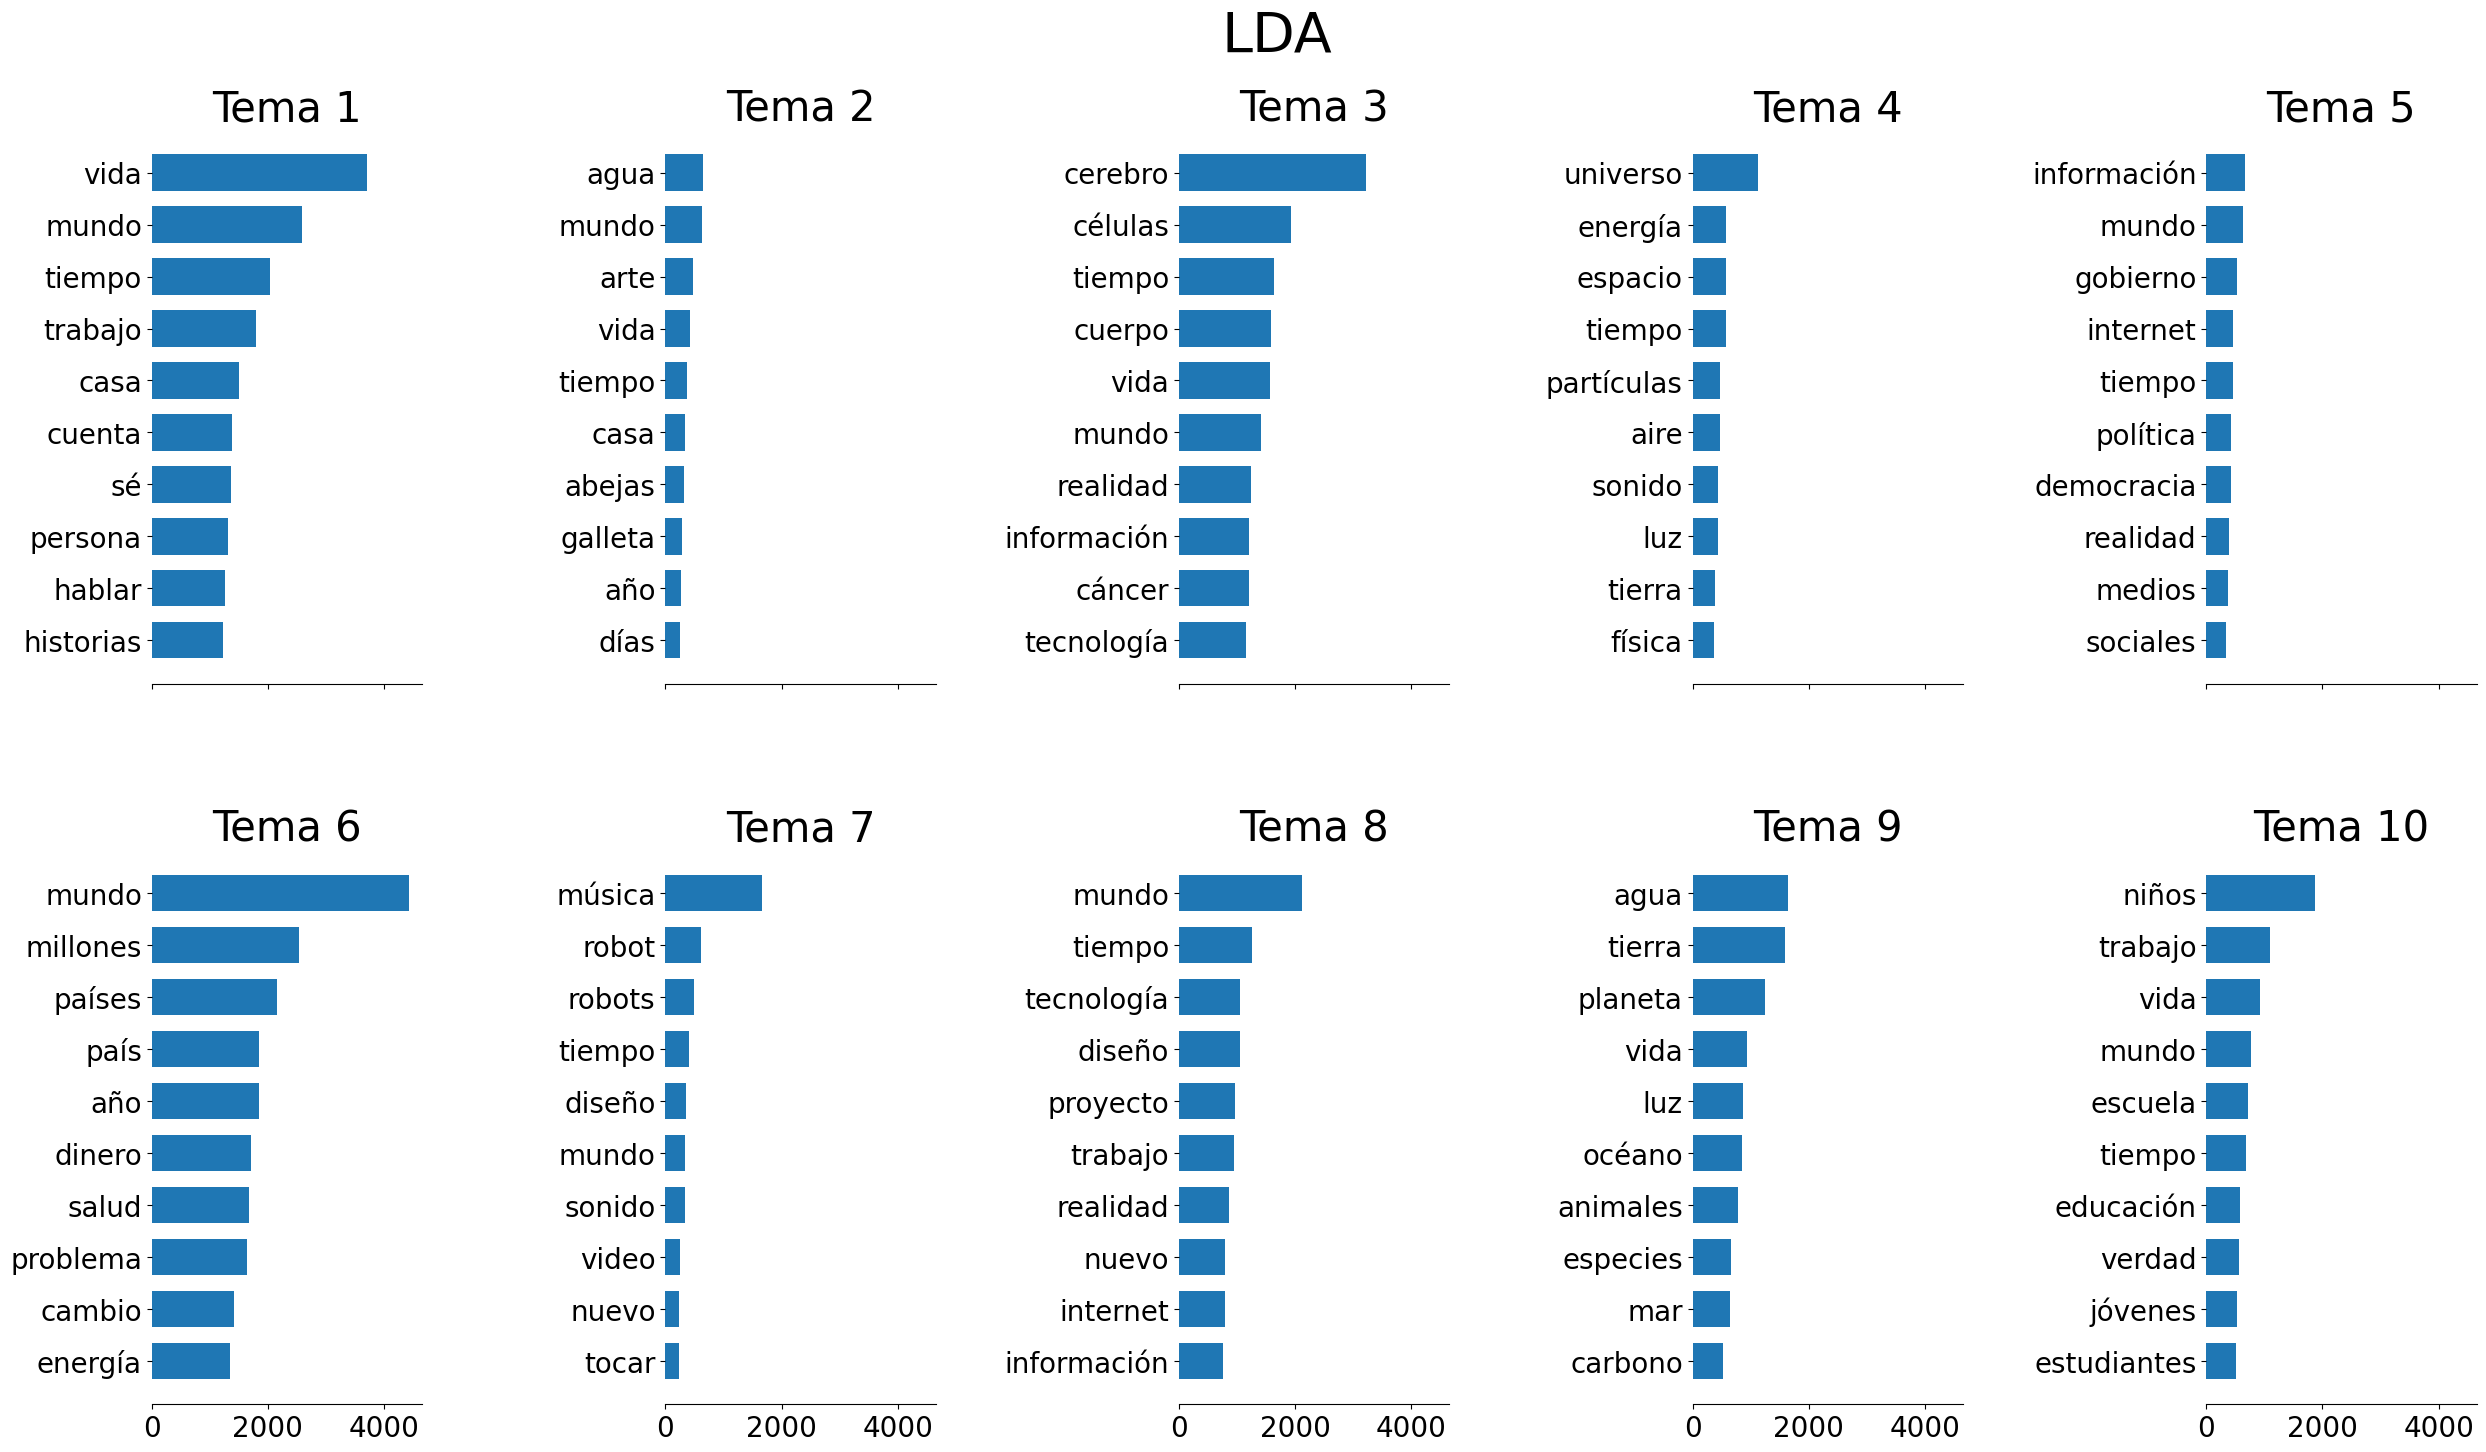

In [34]:
chart_top_words(lda, words) #could be interesting to see the difference with and without the added stopwords

In [28]:
# Should be our responsibility to name these topics


In [ ]:
# Exemple simple de lda.transdform

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Corpus de texte
documents = [
    "chat aime dormir",
    "chien joue dans le jardin",
    "chat et chien aiment jouer",
    "les chiens aboient fort",
    "chat noir dort la nuit"
]

# Vectorisation du corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Modèle LDA avec 3 thèmes
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)



Z = lda.transform(X)

print(Z)
# Exemple de sortie :
# [[0.1  0.6  0.3 ]  # Document 1 : 10% Thème 1, 60% Thème 2, 30% Thème 3
#  [0.2  0.3  0.5 ]  # Document 2 : 20% Thème 1, 30% Thème 2, 50% Thème 3
#  [0.25 0.25 0.5 ]  # Document 3 : 25% pour chaque Thème
#  [0.8  0.1  0.1 ]  # Document 4 : 80% Thème 1, 10% pour les autres
#  [0.3  0.5  0.2 ]]  # Document 5 : 30% Thème 1, 50% Thème 2, 20% Thème 3


In [36]:
Z = lda.transform(X)

In [39]:
print(Z.shape) #3921 rows (docs), 10 columns (topics)

(3921, 10)


In [56]:
i = np.random.choice(len(df)) #nombre entre 0 et len(df)
i
z = Z[i] # probas of belonging of topics (10 probas) for speech number i over 3921
topics = np.arange(10) +1


In [57]:
topics

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Text(0.5, 1.0, 'speech Lo que los doctores pueden aprender el uno del otro  , from Stefan Larsson')

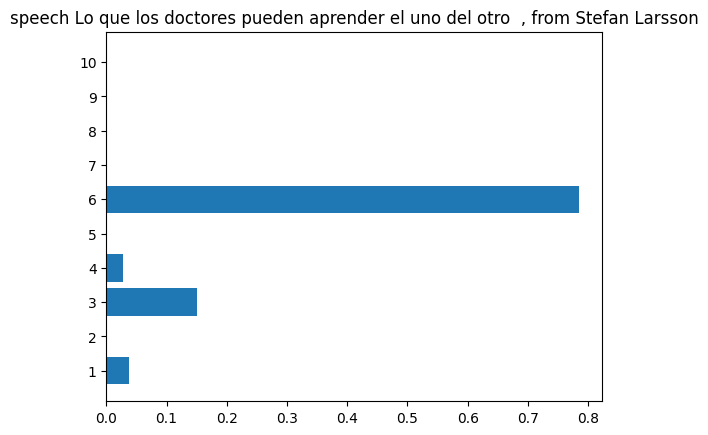

In [62]:
fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title(f'speech {df["title"][i]} , from {df["speaker_1"][i]}') # attention avec les f-string, guillemets simples pour le f et double pour les var


In [63]:
print(df["transcript"][i])

Cinco años atrás, estaba en un año sabático, y regresé a la facultad de medicina donde estudié. Vi pacientes reales y me puse la bata blanca por primera vez en 17 años, de hecho desde que me convertí en consultor. Hubo dos cosas que me sorprendieron durante el mes que pasé allí. La primera fue que los temas comunes de las discusiones eran presupuestos hospitalarios y reducción de costos, y la segunda, que realmente me molestó, en realidad, fue que varios de los colegas que conocía, antiguos amigos de la escuela de medicina, que yo sabía que eran algunas de las personas más inteligentes, más motivadas, comprometidas y apasionadas que jamás he conocido, muchos de ellos se habían vuelto cínicos, desinteresados, o se habían distanciado de la dirección del hospital. Así que con este enfoque en la reducción de costos, me pregunté, ¿nos estamos olvidando del paciente? Muchos países que Uds. representan y de donde yo vengo luchan con el costo de la atención médica. Es una gran parte de los pre